In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data= pd.read_csv('Sales.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [4]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [5]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [6]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [7]:
data.duplicated().sum()

108

# Explorartory data analysis

#### 1. Brand wise distribution

In [8]:
brands = data['Brands'].value_counts()
brands

Brands
SAMSUNG         719
Apple           387
realme          327
OPPO            260
Nokia           213
Xiaomi          198
Infinix         151
GIONEE          129
vivo            124
Lenovo          121
ASUS            118
Motorola        105
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [9]:
explode =[0 for i in range(len(brands))]
explode[0]=0.2
explode[1]=0.1

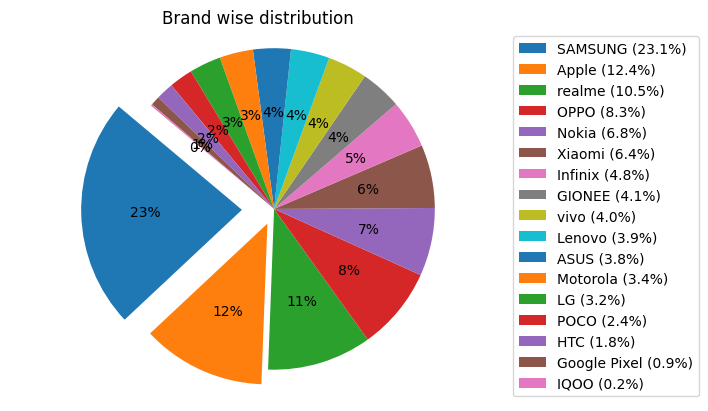

In [10]:
import matplotlib.pyplot as plt

# Assuming 'data' is a DataFrame and 'Brands' is the column with brand names
brands = data['Brands'].value_counts()

# Explode the first two segments for emphasis
explode = [0] * len(brands)
explode[0] = 0.2  # Largest segment
explode[1] = 0.1  # Second largest segment

# Create a pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(brands, explode=explode, autopct='%1.0f%%',
                                   startangle=140)

# Customize legend
percentages = [f'{p:.1f}%' for p in (brands / brands.sum() * 100)]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(brands.index, percentages)]
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Add title
plt.title("Brand wise distribution")

# Ensure the pie is drawn as a circle
ax.axis('equal')

# Show the plot
plt.show()


We can see the majority of the products are from the brand "Samsung" followed by "Apple" and "Realme".

Brands
ASUS             33
Apple            28
GIONEE           61
Google Pixel     11
HTC              29
IQOO              1
Infinix          41
LG               64
Lenovo           55
Motorola         50
Nokia            83
OPPO             77
POCO             14
SAMSUNG         211
Xiaomi           49
realme           62
vivo             59
Name: Models, dtype: int64


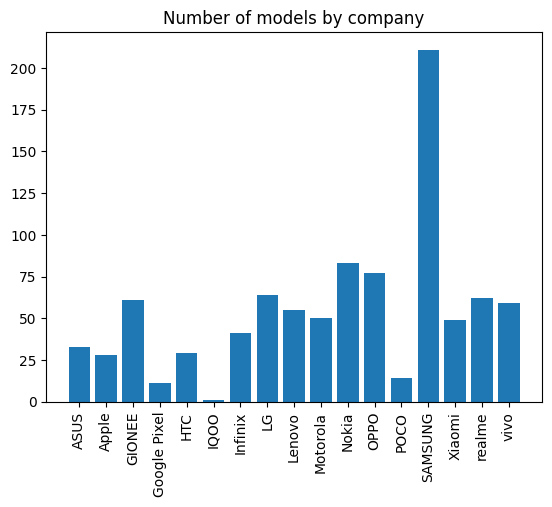

In [11]:
models_of_company = data.groupby('Brands')['Models'].nunique()
print(models_of_company)

plt.figure()
plt.title('Number of models by company')
plt.bar(models_of_company.index, models_of_company.values)
plt.xticks(rotation=90)
plt.show()


We can see **samsumg** has the most number of models in the dataset.

In [12]:
brand_rating = data[['Brands','Rating']]
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3109,POCO,4.4
3110,Nokia,3.6
3111,Apple,4.5
3112,Apple,NaN


In [13]:
color_vs_price = data[['Colors','Selling Price']].sort_values(by='Selling Price',ascending=False)
color_vs_price

,Colors,Selling Price
1185,Sierra Blue,179900
1285,Silver,179900
903,Silver,179900
323,Gold,179900
831,Gold,179900
...,...,...
2487,Black,1099
978,Black,1099
1338,Black,1099
1501,Black,1000


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your original DataFrame

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'Colors' column
color_vs_price['Color_Encoded'] = ordinal_encoder.fit_transform(color_vs_price[['Colors']])
color_vs_price



,Colors,Selling Price,Color_Encoded
1185,Sierra Blue,179900,514.0
1285,Silver,179900,516.0
903,Silver,179900,516.0
323,Gold,179900,247.0
831,Gold,179900,247.0
...,...,...,...
2487,Black,1099,46.0
978,Black,1099,46.0
1338,Black,1099,46.0
1501,Black,1000,46.0


In [15]:
correlation = color_vs_price['Color_Encoded'].corr(color_vs_price['Selling Price'])
correlation


0.1511407738392511

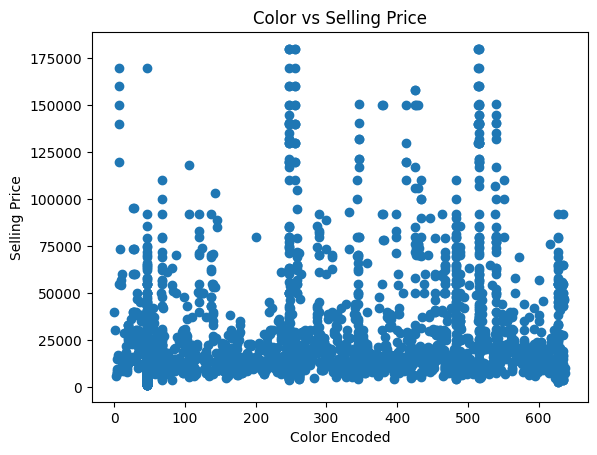

In [16]:
color_vs_price.sort_values(by='Color_Encoded', inplace=True)
plt.figure()
plt.scatter(color_vs_price['Color_Encoded'], color_vs_price['Selling Price'])
plt.xlabel('Color Encoded')
plt.ylabel('Selling Price')
plt.title('Color vs Selling Price')
plt.show()

In [17]:
correlation = data['Selling Price'].corr(data['Discount'])
correlation

0.19118899128519876

In [18]:
correlation = data['Selling Price'].corr(data['discount percentage'])
correlation

-0.06608190153027993